### Objective: To apply Decision Tree Classifier on Amazon Food Review Dataset

#### Loading BoW,Tfidf,Word2Vec Matrices from saved files (Those files were saved by Preprocessing.ipynb)

In [1]:
from scipy import sparse
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import numpy as np
import pandas as pd

In [2]:
#Loading the w2v matrices

with open("w2v_tfidf_X1.txt", "rb") as fp:
    w2v_tfidf_X1 = pickle.load(fp)
with open("w2v_tfidf_Xtest.txt", "rb") as fp:
    w2v_tfidf_Xtest = pickle.load(fp)
with open("w2v_avg_X1.txt", "rb") as fp:
    w2v_avg_X1 = pickle.load(fp)
with open("w2v_avg_Xtest.txt", "rb") as fp:
    w2v_avg_Xtest = pickle.load(fp)


#loading bow matrices

with open("final_counts_X1.txt", "rb") as fp:
    final_counts_X1 = pickle.load(fp)
with open("final_counts_Xtest.txt", "rb") as fp:
    final_counts_Xtest = pickle.load(fp)

#loading tfidf matrices

with open("final_tfidf_X1.txt", "rb") as fp:
    final_tfidf_X1 = pickle.load(fp)
with open("final_tfidf_Xtest.txt", "rb") as fp:
    final_tfidf_Xtest = pickle.load(fp)


In [3]:
#Loading target vectors
with open("y_1.txt", "rb") as fp:
    y_1 = pickle.load(fp)
with open("y_test.txt", "rb") as fp:
    y_test = pickle.load(fp)

In [4]:
#Loading the model objects
with open("count_vect.txt", "rb") as fp:
    count_vect = pickle.load(fp)
with open("tfidf_vect.txt", "rb") as fp:
    tfidf_vect = pickle.load(fp)

### 1. BoW Method

##### 1.1 Standardization

In [6]:
from sklearn.preprocessing import StandardScaler

In [6]:
colstd=StandardScaler(with_mean=False)
colstd.fit_transform(final_counts_X1)

/home/hduser/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/home/hduser/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<70000x8377 sparse matrix of type '<class 'numpy.float64'>'
	with 2254778 stored elements in Compressed Sparse Row format>

In [7]:
colstd.transform(final_counts_Xtest)

/home/hduser/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


<30000x8377 sparse matrix of type '<class 'numpy.float64'>'
	with 934770 stored elements in Compressed Sparse Row format>

In [164]:
np.unique(y_1,return_counts=True)

(array([-1,  1]), array([11405, 58595]))

In [9]:
final_counts_X1.shape

(70000, 8377)

In [10]:
#### 1.2 GridSearchCV
'''tuned_parameters=[{'max_depth':[i for i in range(5,30,2)]}]
y_1 = np.array(list(map(lambda x:-1*x,y_1)))
y_test = np.array(list(map(lambda x:-1*x,y_test)))
model = GridSearchCV(DecisionTreeClassifier(max_features=0.8),tuned_parameters,scoring='precision')
model.fit(final_counts_X1,y_1)
print(model.best_estimator_)
print(model.score(final_counts_Xtest,y_test))
y_1 = np.array(list(map(lambda x:-1*x,y_1)))
y_test = np.array(list(map(lambda x:-1*x,y_test)))'''

#### 1.2 Cross Validation

In [104]:
final_counts_Xtrain = final_counts_X1[:50000,:]
final_counts_Xcv = final_counts_X1[50000:,:]

In [105]:
final_counts_X1[1]

<1x8377 sparse matrix of type '<class 'numpy.int64'>'
	with 16 stored elements in Compressed Sparse Row format>

In [106]:
y_train = y_1[:50000]
y_cv = y_1[50000:]

In [83]:
y_train = np.array(list(map(lambda x:-1*x,y_train)))
y_cv= np.array(list(map(lambda x:-1*x,y_cv)))

In [107]:
from matplotlib import gridspec

For values of max_depth =  1 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8371
For values of max_depth =  3 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8375
For values of max_depth =  5 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8380
For values of max_depth =  7 The CV avg precision score is: 0.8391 The Train avg precision score is: 0.8384
For values of max_depth =  9 The CV avg precision score is: 0.8392 The Train avg precision score is: 0.8387
For values of max_depth =  11 The CV avg precision score is: 0.8392 The Train avg precision score is: 0.8391
For values of max_depth =  13 The CV avg precision score is: 0.8391 The Train avg precision score is: 0.8395
For values of max_depth =  15 The CV avg precision score is: 0.8392 The Train avg precision score is: 0.8399
For values of max_depth =  17 The CV avg precision score is: 0.8393 The Train avg precision score is: 0.8402
For values of max_depth 

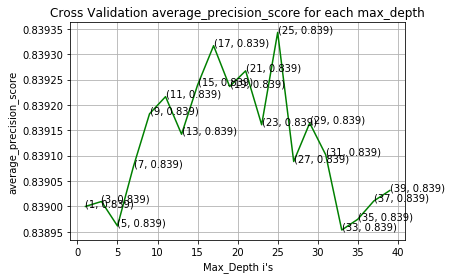

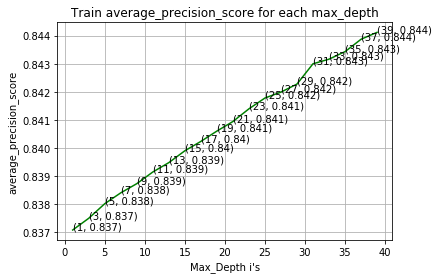

In [121]:
max_depth = [i for i in range(1,40,2)] # hyperparam for Decision Tree.

cv_score=[]
train_score=[]
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i,max_features=0.8, random_state=42)
    clf.fit(final_counts_Xtrain, y_train)
    predict_y = clf.predict(final_counts_Xcv)
    predict_y1 = clf.predict(final_counts_X1)
    cv_score.append(metrics.average_precision_score(y_cv, predict_y))
    train_score.append(metrics.average_precision_score(y_1, predict_y1))
    print('For values of max_depth = ', i, "The CV avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_cv, predict_y)),"The Train avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_1, predict_y1)))


fig,ax = plt.subplots()
ax.plot(max_depth, cv_score,c='g')
for i, txt in enumerate(np.round(cv_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],cv_score[i]))
plt.grid()
plt.title("Cross Validation average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()

fig,ax = plt.subplots()
ax.plot(max_depth, train_score,c='g')
for i, txt in enumerate(np.round(train_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],train_score[i]))
plt.grid()
plt.title("Train average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()



In [85]:
y_train = np.array(list(map(lambda x:-1*x,y_train)))
y_cv= np.array(list(map(lambda x:-1*x,y_cv)))

#### 1.3 Applying Decision Tree Classifier with derived max_depth value

In [134]:
DT=DecisionTreeClassifier(max_depth=26,max_features=0.8)
DT.fit(final_counts_X1, y_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=26,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [34]:
metrics.f1_score(y_test,DT.predict(final_counts_Xtest))

0.8500617634948334

In [123]:
tn,fn,fp,tp=(metrics.confusion_matrix(y_test,DT.predict(final_counts_Xtest))).ravel()

In [135]:
tn1,fn1,fp1,tp1=(metrics.confusion_matrix(y_1,DT.predict(final_counts_X1))).ravel()

In [36]:
y_test.shape

(30000,)

In [125]:
prec = metrics.precision_score(y_test,DT.predict(final_counts_Xtest))

In [128]:
recall= metrics.recall_score(y_test,DT.predict(final_counts_Xtest))

In [39]:
f1 = metrics.f1_score(y_test,DT.predict(final_counts_Xtest))

In [40]:
accuracy= metrics.accuracy_score(y_test,DT.predict(final_counts_Xtest))

In [41]:
specificity = tn/float(tn+fp)

In [42]:
neg_pred_value = tn/float(tn+fn)

In [43]:
performance_table = pd.DataFrame({'Accuracy Score':[accuracy],'Precision':[prec],'Recall':[recall],'F1_Score':[f1],'Specificity':[specificity],'Negative_Predicted_Value':[neg_pred_value]},index=['BoW'])

In [44]:
performance_table

,Accuracy Score,Precision,Recall,F1_Score,Specificity,Negative_Predicted_Value
BoW,0.7451,0.843562,0.856663,0.850062,0.1571,0.143952


In [129]:
con_matrix=metrics.confusion_matrix(y_test,DT.predict(final_counts_Xtest))

In [136]:
con_matrix1=metrics.confusion_matrix(y_1,DT.predict(final_counts_X1))

In [131]:
df_con = pd.DataFrame(con_matrix.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [137]:
df_con1 = pd.DataFrame(con_matrix1.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [47]:
y_pred_prob=DT.predict_proba(final_counts_Xtest)

In [48]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

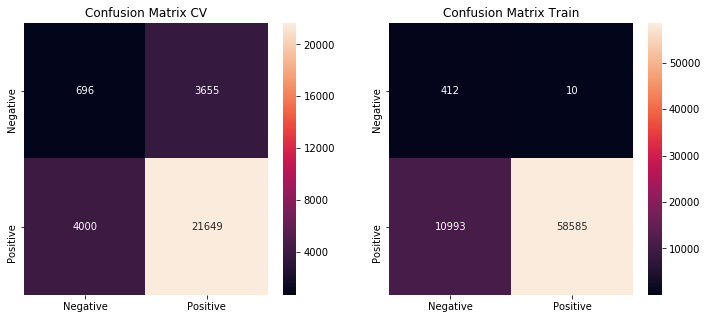

In [138]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Confusion Matrix CV')
sns.heatmap(df_con,annot=True,fmt='g')
plt.subplot(122)
plt.title('Confusion Matrix Train')
sns.heatmap(df_con1,annot=True,fmt='g')
plt.show()

##### 1.4 Feature Importance

In [183]:
from wordcloud import WordCloud

In [184]:
from matplotlib import gridspec

In [185]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(15,7), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('DTbow.png', facecolor='w', bbox_inches='tight')

In [182]:
bow_feats = count_vect.get_feature_names()

In [186]:
sorted_indices = np.argsort(-DT.feature_importances_)

In [187]:
imp_features = np.take(bow_feats,sorted_indices[:100])

In [188]:
corpus=' '
for item in imp_features:
    corpus=corpus+item+' '

In [201]:
wordcloud = WordCloud(width=900, height=400).generate(corpus)

============================================= WordCloud of Important Words ============================================


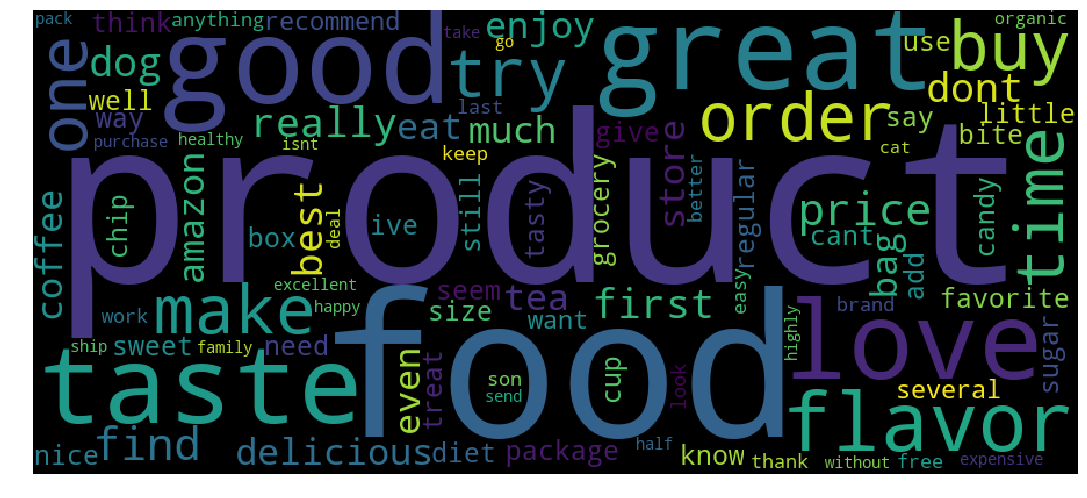

<Figure size 432x288 with 0 Axes>

In [204]:
print("="*45,'WordCloud of Important Words',"="*44)
plot_Cloud(wordcloud)
print("="*120)

##### 1.5 Visualizing the tree

In [37]:
from graphviz import Digraph,Source

In [38]:
from sklearn import tree

In [39]:
import pydotplus

In [40]:
tree.export_graphviz(DT, out_file='DT_BoW.dot',class_names=['Positive',"Negative"],
    feature_names=count_vect.get_feature_names(),impurity=False,filled=True)

In [ ]:
with open("DT_BoW.dot") as f:
    dot_graph=f.read()
Source(dot_graph)

### 2.Tfidf Method

##### 2.1 Standardization

In [205]:
colstd=StandardScaler(with_mean=False)
colstd.fit_transform(final_tfidf_X1)

<70000x8377 sparse matrix of type '<class 'numpy.float64'>'
	with 2254778 stored elements in Compressed Sparse Row format>

In [206]:
colstd.transform(final_tfidf_Xtest)

<30000x8377 sparse matrix of type '<class 'numpy.float64'>'
	with 934770 stored elements in Compressed Sparse Row format>

In [207]:
np.unique(y_1,return_counts=True)

(array([-1,  1]), array([11405, 58595]))

#### 2.2 Cross Validation

In [144]:
final_tfidf_Xtrain = final_tfidf_X1[:50000,:]
final_tfidf_Xcv = final_tfidf_X1[50000:,:]

In [145]:
y_train = y_1[:50000]
y_cv = y_1[50000:]

For values of max_depth =  1 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8371
For values of max_depth =  3 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8373
For values of max_depth =  5 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8381
For values of max_depth =  7 The CV avg precision score is: 0.8392 The Train avg precision score is: 0.8386
For values of max_depth =  9 The CV avg precision score is: 0.8391 The Train avg precision score is: 0.8389
For values of max_depth =  11 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8395
For values of max_depth =  13 The CV avg precision score is: 0.8391 The Train avg precision score is: 0.8399
For values of max_depth =  15 The CV avg precision score is: 0.8389 The Train avg precision score is: 0.8402
For values of max_depth =  17 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8405
For values of max_depth 

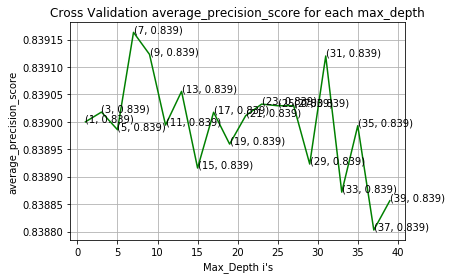

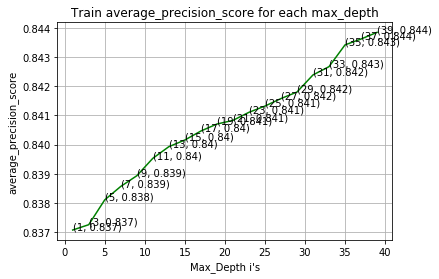

In [146]:
max_depth = [i for i in range(1,40,2)] # hyperparam for Decision Tree.

cv_score=[]
train_score=[]
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i,max_features=0.8, random_state=42)
    clf.fit(final_tfidf_Xtrain, y_train)
    predict_y = clf.predict(final_tfidf_Xcv)
    predict_y1 = clf.predict(final_tfidf_X1)
    cv_score.append(metrics.average_precision_score(y_cv, predict_y))
    train_score.append(metrics.average_precision_score(y_1, predict_y1))
    print('For values of max_depth = ', i, "The CV avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_cv, predict_y)),"The Train avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_1, predict_y1)))


fig,ax = plt.subplots()
ax.plot(max_depth, cv_score,c='g')
for i, txt in enumerate(np.round(cv_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],cv_score[i]))
plt.grid()
plt.title("Cross Validation average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()

fig,ax = plt.subplots()
ax.plot(max_depth, train_score,c='g')
for i, txt in enumerate(np.round(train_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],train_score[i]))
plt.grid()
plt.title("Train average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()



#### 2.3 Applying Decision Tree Classifier with derived max_depth value

In [150]:
DT=DecisionTreeClassifier(max_depth=26,max_features=0.8)
DT.fit(final_tfidf_X1, y_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=26,
            max_features=0.8, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [52]:
metrics.f1_score(y_test,DT.predict(final_tfidf_Xtest))

0.8475183588289725

In [148]:
tn,fn,fp,tp=(metrics.confusion_matrix(y_test,DT.predict(final_tfidf_Xtest))).ravel()

In [151]:
tn1,fn1,fp1,tp1=(metrics.confusion_matrix(y_1,DT.predict(final_tfidf_X1))).ravel()

In [54]:
y_test.shape

(30000,)

In [55]:
prec = metrics.precision_score(y_test,DT.predict(final_tfidf_Xtest))

In [56]:
recall= metrics.recall_score(y_test,DT.predict(final_tfidf_Xtest))

In [57]:
f1 = metrics.f1_score(y_test,DT.predict(final_tfidf_Xtest))

In [58]:
accuracy= metrics.accuracy_score(y_test,DT.predict(final_tfidf_Xtest))

In [59]:
specificity = tn/float(tn+fp)

In [60]:
neg_pred_value = tn/float(tn+fn)

In [61]:
df1 = pd.DataFrame({'Accuracy Score':[accuracy],'Precision':[prec],'Recall':[recall],'F1_Score':[f1],'Specificity':[specificity],'Negative_Predicted_Value':[neg_pred_value]},index=['Tfidf'])

In [63]:
performance_table=performance_table.append(df1)

In [64]:
performance_table

,Accuracy Score,Precision,Recall,F1_Score,Specificity,Negative_Predicted_Value
BoW,0.745100,0.843562,0.856663,0.850062,0.157100,0.143952
Tfidf,0.741833,0.844443,0.850617,0.847518,0.162048,0.155664


In [152]:
con_matrix=metrics.confusion_matrix(y_test,DT.predict(final_counts_Xtest))

In [153]:
df_con = pd.DataFrame(con_matrix.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [154]:
con_matrix1=metrics.confusion_matrix(y_1,DT.predict(final_counts_X1))

In [155]:
df_con1 = pd.DataFrame(con_matrix1.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [67]:
y_pred_prob=DT.predict_proba(final_counts_Xtest)

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

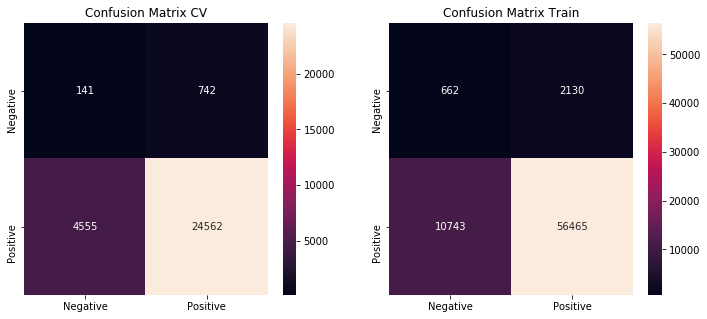

In [156]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Confusion Matrix CV')
sns.heatmap(df_con,annot=True,fmt='g')
plt.subplot(122)
plt.title('Confusion Matrix Train')
sns.heatmap(df_con1,annot=True,fmt='g')
plt.show()

##### 2.4 Feature Importance

In [228]:
from wordcloud import WordCloud

In [229]:
from matplotlib import gridspec

In [230]:
def plot_Cloud(wordCloud):
    plt.figure( figsize=(15,7), facecolor='w')
    plt.imshow(wordCloud)
    plt.axis("off")
    plt.tight_layout(pad=0)
    plt.show()
    plt.savefig('DTbow.png', facecolor='w', bbox_inches='tight')

In [232]:
tfidf_feats = tfidf_vect.get_feature_names()

In [233]:
sorted_indices = np.argsort(-DT.feature_importances_)

In [234]:
imp_features = np.take(tfidf_feats,sorted_indices[:100])

In [235]:
corpus=' '
for item in imp_features:
    corpus=corpus+item+' '

In [238]:
wordcloud = WordCloud(width=900, height=400).generate(corpus)

============================================= WordCloud of Important Words ============================================


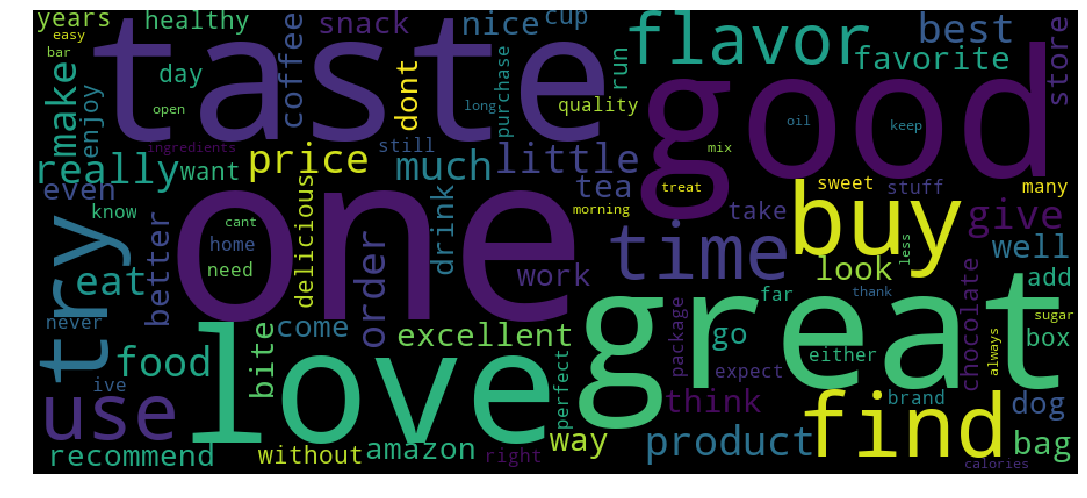

<Figure size 432x288 with 0 Axes>

In [239]:
print("="*45,'WordCloud of Important Words',"="*44)
plot_Cloud(wordcloud)
print("="*120)

##### 2.5 Visualizing the tree

In [72]:
tree.export_graphviz(DT, out_file='DT_Tfidf.dot',class_names=['Positive',"Negative"],
    feature_names=tfidf_vect.get_feature_names(),impurity=False,filled=True)

In [ ]:
with open("DT_Tfidf.dot") as f:
    dot_graph=f.read()
Source(dot_graph)

### 3. Average Word2Vec

##### 3.1 Standardization

In [7]:
colstd=StandardScaler(with_mean=False)
colstd.fit_transform(w2v_avg_X1)

array([[ 1.37211846,  0.03506239,  0.0522179 , ..., -0.27191124,
        -1.48403994,  1.36539519],
       [ 0.12646393,  0.19984476, -0.59863643, ..., -0.19327331,
        -0.06726377,  1.71259282],
       [-0.08476497, -1.12833425, -1.12939521, ..., -1.4619084 ,
        -0.0760958 ,  1.02152255],
       ...,
       [ 0.11206881, -3.30263953, -1.40945576, ..., -0.78598773,
         0.16312454,  0.92084291],
       [ 2.20879067,  1.09436877, -3.05178154, ..., -2.84115984,
        -0.18274932,  0.47717282],
       [-0.59679746, -1.95642796, -1.11970739, ..., -0.22611513,
         0.46785741,  0.84371286]])

In [8]:
colstd.transform(w2v_avg_Xtest)

array([[ 1.74125104, -1.75866833, -2.41462817, ..., -0.81410408,
         0.67474665,  1.69397053],
       [ 0.96269601, -1.95381356, -1.86956823, ..., -0.83359558,
        -0.17256444,  0.54442118],
       [ 1.59225937, -1.97012941, -2.47770478, ..., -1.97706495,
         0.99762575,  0.47169349],
       ...,
       [ 2.96667787, -0.50521545, -0.6572189 , ..., -2.30743132,
         0.07296854,  0.95714609],
       [ 2.03415669,  0.94056333, -0.12423311, ..., -2.53342536,
         0.58969979,  0.7121424 ],
       [ 0.64011772, -0.388569  ,  0.61752462, ..., -1.13469322,
         0.13052781,  0.03013544]])

In [9]:
np.unique(y_1,return_counts=True)

(array([-1,  1]), array([11405, 58595]))

#### 3.2 Cross Validation

In [157]:
w2v_avg_Xtrain = w2v_avg_X1[:50000]
w2v_avg_Xcv = w2v_avg_X1[50000:]

In [158]:
y_train = y_1[:50000]
y_cv = y_1[50000:]

For values of max_depth =  1 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8371
For values of max_depth =  3 The CV avg precision score is: 0.8389 The Train avg precision score is: 0.8372
For values of max_depth =  5 The CV avg precision score is: 0.8387 The Train avg precision score is: 0.8378
For values of max_depth =  7 The CV avg precision score is: 0.8389 The Train avg precision score is: 0.8390
For values of max_depth =  9 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8404
For values of max_depth =  11 The CV avg precision score is: 0.8387 The Train avg precision score is: 0.8420
For values of max_depth =  13 The CV avg precision score is: 0.8392 The Train avg precision score is: 0.8457
For values of max_depth =  15 The CV avg precision score is: 0.8400 The Train avg precision score is: 0.8477
For values of max_depth =  17 The CV avg precision score is: 0.8393 The Train avg precision score is: 0.8532
For values of max_depth 

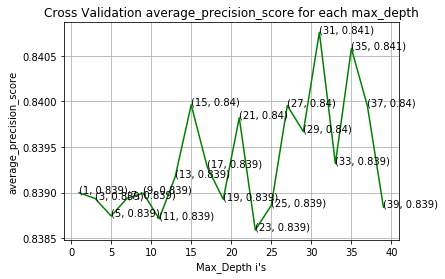

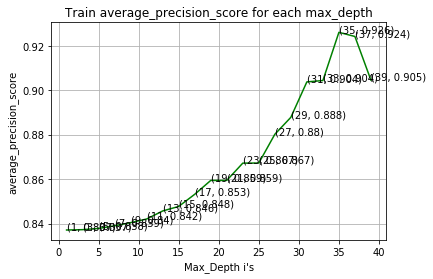

In [159]:
max_depth = [i for i in range(1,40,2)] # hyperparam for Decision Tree.

cv_score=[]
train_score=[]
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i,max_features=0.8, random_state=42)
    clf.fit(w2v_avg_Xtrain, y_train)
    predict_y = clf.predict(w2v_avg_Xcv)
    predict_y1 = clf.predict(w2v_avg_X1)
    cv_score.append(metrics.average_precision_score(y_cv, predict_y))
    train_score.append(metrics.average_precision_score(y_1, predict_y1))
    print('For values of max_depth = ', i, "The CV avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_cv, predict_y)),"The Train avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_1, predict_y1)))


fig,ax = plt.subplots()
ax.plot(max_depth, cv_score,c='g')
for i, txt in enumerate(np.round(cv_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],cv_score[i]))
plt.grid()
plt.title("Cross Validation average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()

fig,ax = plt.subplots()
ax.plot(max_depth, train_score,c='g')
for i, txt in enumerate(np.round(train_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],train_score[i]))
plt.grid()
plt.title("Train average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()



#### 3.3 Applying Decision Tree Classifier with derived max_depth value

In [162]:
DT=DecisionTreeClassifier(max_depth=31)
DT.fit(w2v_avg_X1,y_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=31,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [71]:
metrics.f1_score(y_test,DT.predict(w2v_avg_Xtest))

0.88684694145445

In [161]:
tn,fn,fp,tp=(metrics.confusion_matrix(y_test,DT.predict(w2v_avg_Xtest))).ravel()

In [73]:
y_test.shape

(30000,)

In [74]:
prec = metrics.precision_score(y_test,DT.predict(w2v_avg_Xtest))

In [75]:
recall= metrics.recall_score(y_test,DT.predict(w2v_avg_Xtest))

In [76]:
f1 = metrics.f1_score(y_test,DT.predict(w2v_avg_Xtest))

In [77]:
accuracy= metrics.accuracy_score(y_test,DT.predict(w2v_avg_Xtest))

In [78]:
specificity = tn/float(tn+fp)

In [79]:
neg_pred_value = tn/float(tn+fn)

In [80]:
df2 = pd.DataFrame({'Accuracy Score':[accuracy],'Precision':[prec],'Recall':[recall],'F1_Score':[f1],'Specificity':[specificity],'Negative_Predicted_Value':[neg_pred_value]},index=['Avg_Word2Vec'])

In [81]:
performance_table=performance_table.append(df2)

In [163]:
con_matrix=metrics.confusion_matrix(y_test,DT.predict(w2v_avg_Xtest))

In [164]:
df_con = pd.DataFrame(con_matrix.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [166]:
con_matrix1=metrics.confusion_matrix(y_1,DT.predict(w2v_avg_X1))

In [167]:
df_con1 = pd.DataFrame(con_matrix1.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [85]:
y_pred_prob=DT.predict_proba(w2v_avg_Xtest)

In [86]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

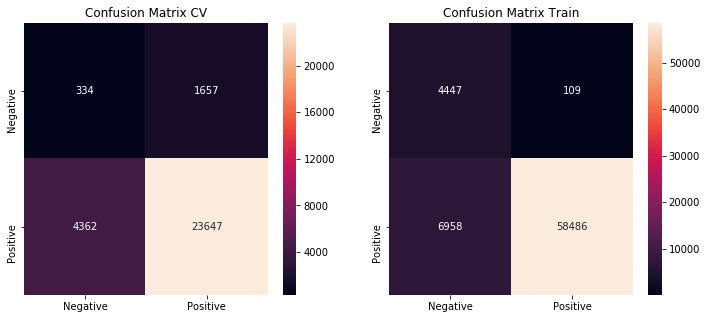

In [169]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Confusion Matrix CV')
sns.heatmap(df_con,annot=True,fmt='g')
plt.subplot(122)
plt.title('Confusion Matrix Train')
sns.heatmap(df_con1,annot=True,fmt='g')
plt.show()

### 4. Tfidf Word2Vec

##### 4.1 Standardization

In [100]:
colstd=StandardScaler(with_mean=False)
colstd.fit_transform(w2v_tfidf_X1)

array([[ 1.83133074,  0.50030904,  0.28630874, ...,  0.76198914,
        -0.77018133,  0.47706177],
       [ 1.48196905,  0.45951784, -0.81662575, ...,  1.32072288,
         0.379618  ,  1.58167857],
       [-0.08471732, -1.71135522, -0.95637919, ...,  0.8490911 ,
        -0.05445494, -0.78302902],
       ...,
       [ 0.21162988, -2.52844864, -2.36159177, ..., -0.53524161,
         0.53538094, -0.36153228],
       [ 2.4795576 ,  1.53763301, -1.4484873 , ..., -0.80567099,
         0.23848989, -0.22300105],
       [ 0.50333328, -1.24194005, -1.35567819, ...,  1.55120465,
         0.78249052, -0.10764208]])

In [101]:
colstd.transform(w2v_tfidf_Xtest)

array([[ 3.44368346, -0.40273501, -0.15273443, ...,  1.77664081,
        -0.23758771, -0.37796892],
       [ 2.77440656,  2.16720207, -0.75857642, ...,  0.8749116 ,
        -0.12683929,  0.6095275 ],
       [ 0.79323026, -1.21549254,  1.2965808 , ..., -2.22259004,
         0.64063835, -1.08553975],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.40795755,  0.12905951, -1.16301777, ...,  0.55982857,
        -0.30934286,  0.67055245]])

In [102]:
np.unique(y_1,return_counts=True)

(array([-1,  1]), array([11405, 58595]))

#### 4.2 Cross Validation

In [175]:
w2v_tfidf_Xtrain = w2v_tfidf_X1[:50000]
w2v_tfidf_Xcv = w2v_tfidf_X1[50000:]

In [176]:
y_train = y_1[:50000]
y_cv = y_1[50000:]

For values of max_depth =  1 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8371
For values of max_depth =  3 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8372
For values of max_depth =  5 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8373
For values of max_depth =  7 The CV avg precision score is: 0.8390 The Train avg precision score is: 0.8375
For values of max_depth =  9 The CV avg precision score is: 0.8391 The Train avg precision score is: 0.8383
For values of max_depth =  11 The CV avg precision score is: 0.8394 The Train avg precision score is: 0.8396
For values of max_depth =  13 The CV avg precision score is: 0.8389 The Train avg precision score is: 0.8402
For values of max_depth =  15 The CV avg precision score is: 0.8386 The Train avg precision score is: 0.8445
For values of max_depth =  17 The CV avg precision score is: 0.8395 The Train avg precision score is: 0.8483
For values of max_depth 

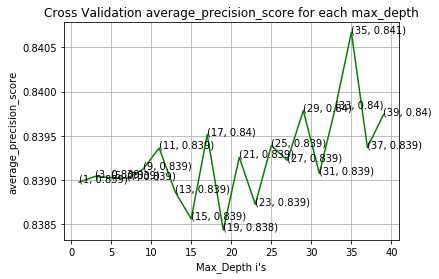

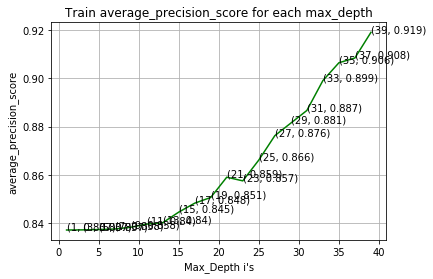

In [177]:
max_depth = [i for i in range(1,40,2)] # hyperparam for Decision Tree.

cv_score=[]
train_score=[]
for i in max_depth:
    clf = DecisionTreeClassifier(max_depth=i,max_features=0.8, random_state=42)
    clf.fit(w2v_tfidf_Xtrain, y_train)
    predict_y = clf.predict(w2v_tfidf_Xcv)
    predict_y1 = clf.predict(w2v_tfidf_X1)
    cv_score.append(metrics.average_precision_score(y_cv, predict_y))
    train_score.append(metrics.average_precision_score(y_1, predict_y1))
    print('For values of max_depth = ', i, "The CV avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_cv, predict_y)),"The Train avg precision score is: {0:.4f}".format(metrics.average_precision_score(y_1, predict_y1)))


fig,ax = plt.subplots()
ax.plot(max_depth, cv_score,c='g')
for i, txt in enumerate(np.round(cv_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],cv_score[i]))
plt.grid()
plt.title("Cross Validation average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()

fig,ax = plt.subplots()
ax.plot(max_depth, train_score,c='g')
for i, txt in enumerate(np.round(train_score,3)):
    ax.annotate((max_depth[i],np.round(txt,3)), (max_depth[i],train_score[i]))
plt.grid()
plt.title("Train average_precision_score for each max_depth")
plt.xlabel("Max_Depth i's")
plt.ylabel("average_precision_score")
plt.show()



#### 4.3 Applying Decision Tree Classifier with derived max_depth value

In [178]:
DT=DecisionTreeClassifier(max_depth=35)
DT.fit(w2v_tfidf_X1,y_1)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=35,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [88]:
metrics.f1_score(y_test,DT.predict(w2v_tfidf_Xtest))

0.8626807467325625

In [89]:
tn,fn,fp,tp=(metrics.confusion_matrix(y_test,DT.predict(w2v_tfidf_Xtest))).ravel()

In [90]:
y_test.shape

(30000,)

In [91]:
prec = metrics.precision_score(y_test,DT.predict(w2v_tfidf_Xtest))

In [92]:
recall= metrics.recall_score(y_test,DT.predict(w2v_tfidf_Xtest))

In [93]:
f1 = metrics.f1_score(y_test,DT.predict(w2v_tfidf_Xtest))

In [94]:
accuracy= metrics.accuracy_score(y_test,DT.predict(w2v_tfidf_Xtest))

In [95]:
specificity = tn/float(tn+fp)

In [96]:
neg_pred_value = tn/float(tn+fn)

In [97]:
df2 = pd.DataFrame({'Accuracy Score':[accuracy],'Precision':[prec],'Recall':[recall],'F1_Score':[f1],'Specificity':[specificity],'Negative_Predicted_Value':[neg_pred_value]},index=['Tfidf_Word2Vec'])

In [98]:
performance_table=performance_table.append(df2)

In [179]:
con_matrix=metrics.confusion_matrix(y_test,DT.predict(w2v_tfidf_Xtest))

In [180]:
df_con = pd.DataFrame(con_matrix.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [181]:
con_matrix1=metrics.confusion_matrix(y_1,DT.predict(w2v_tfidf_X1))

In [182]:
df_con1 = pd.DataFrame(con_matrix1.T,columns=['Negative','Positive'],index=['Negative','Positive'])

In [67]:
y_pred_prob=DT.predict_proba(w2v_avg_Xtest)

In [68]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob[:,1], pos_label=1)

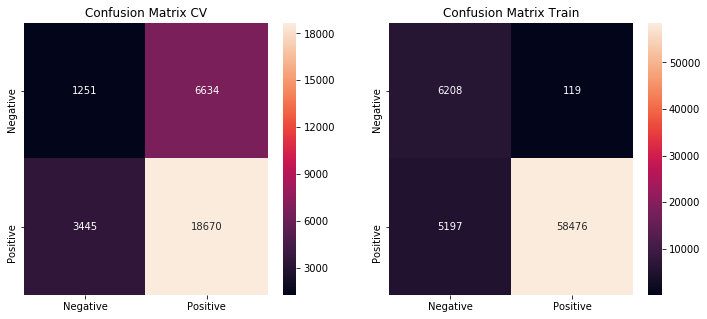

In [184]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.title('Confusion Matrix CV')
sns.heatmap(df_con,annot=True,fmt='g')
plt.subplot(122)
plt.title('Confusion Matrix Train')
sns.heatmap(df_con1,annot=True,fmt='g')
plt.show()

In [99]:
with open('dt_perf_table.txt','wb') as f:
    pickle.dump(performance_table,f)

#### Summary
- Preprocessed train and test data for BoW,Tfidf,Word2Vec models were saved by Preprocessing.ipynb file
- Train,Test data was loaded. Tfidf,BoW model objects also loaded
- Tried Bag of Words, Tfidf, Average Word2Vec and Tfidf Word2Vec. For each method following steps are performed
 - Column Standardization
 - Manual cross validation by breaking 70k rows of train data into 50k train 20k cv data, for hyperparameter tuning
 - As the dataset is imbalanced and there are more +ve class data compared to -ve class data, average precision score is used as performance measure to handle the imbalance
 - Applied Decision Tree with derived parameters
 - Feature Importance
 - Printing the Decision Tree
 - In Tfidf,BoW printed important words using Wordnet

In [100]:
from IPython.display import display

In [101]:
print("="*35,'performance_table',"="*35)
display(performance_table)
print("="*92)

=================================== performance_table ===================================


,Accuracy Score,Precision,Recall,F1_Score,Specificity,Negative_Predicted_Value
BoW,0.745100,0.843562,0.856663,0.850062,0.157100,0.143952
Tfidf,0.741833,0.844443,0.850617,0.847518,0.162048,0.155664
Avg_Word2Vec,0.798867,0.843837,0.934477,0.886847,0.161780,0.068143
Tfidf_Word2Vec,0.762900,0.843291,0.882983,0.862681,0.155207,0.115843
